In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
import matplotlib.gridspec as gridspec

In [2]:
data = pd.read_csv("Dataseti\GrammarandProductReviews.csv")

In [3]:
#jo-balancim i datasetit

revPurchTrue = data[data['reviews.didPurchase'] == True]['reviews.didPurchase'].reset_index().drop('index',axis=1).count()
revPurchFalse = data[data['reviews.didPurchase'] == False]['reviews.didPurchase'].reset_index().drop('index',axis=1).count()
dataToPerform = pd.DataFrame({"RevPurchasedTrue":revPurchTrue,"RevPurchasedFalse":revPurchFalse}).T.rename({'reviews.didPurchase':'Total'},axis=1)

dataToPerform

,Total
RevPurchasedTrue,3682
RevPurchasedFalse,28476


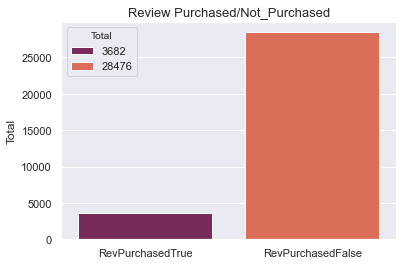

In [4]:
sns.set()
ax = sns.barplot(x=dataToPerform.index, y='Total',data=dataToPerform, hue='Total',palette="rocket",dodge=False)
ax.set_title("Review Purchased/Not_Purchased", fontsize=13)

ax.figure.savefig("Review Purchased_Not_Purchased.png");

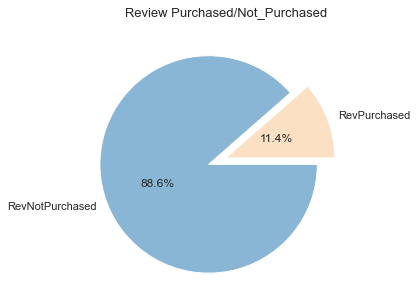

In [5]:
pie, ax = plt.subplots(figsize=[5,5])
labels = dataToPerform.keys()

plt.pie(x=dataToPerform['Total'], autopct="%.1f%%", explode=(0, 0.17), labels=['RevPurchased','RevNotPurchased'], pctdistance=0.5,
        colors=['#fbe0c4','#8ab6d6'])
plt.title("Review Purchased/Not_Purchased", fontsize=13);

plt.savefig("Review Purchased_Not_Purchased.jpeg");

In [6]:
revRecomanded = data[data['reviews.doRecommend'] == True]['reviews.doRecommend'].reset_index().drop('index',axis=1).count()
revNotRecomanded = data[data['reviews.doRecommend'] == False]['reviews.doRecommend'].reset_index().drop('index',axis=1).count()
dataToPerform = pd.DataFrame({"RevRecommended":revRecomanded,"RevNotRecommended":revNotRecomanded}).T.rename({'reviews.doRecommend':'Total'},axis=1)
dataToPerform

,Total
RevRecommended,55587
RevNotRecommended,4842


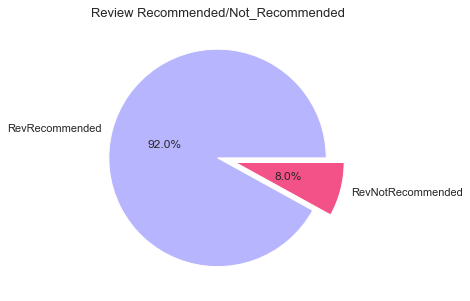

In [7]:
ax = plt.subplots(figsize=[5,5])
labels = dataToPerform.keys()

plt.pie(x=dataToPerform['Total'], autopct="%.1f%%", explode=(0, 0.17), labels=['RevRecommended','RevNotRecommended'], pctdistance=0.5,
        colors=['#b8b5ff','#f25287'])
plt.title("Review Recommended/Not_Recommended", fontsize=13);

plt.savefig("Review Recommended_Not_Recommended.jpeg");

In [8]:
reviewsRating = data['reviews.rating'].value_counts().sort_index().rename(index='Ratings').to_frame()
reviewsRating

,Ratings
1,3701
2,1833
3,4369
4,14598
5,46543


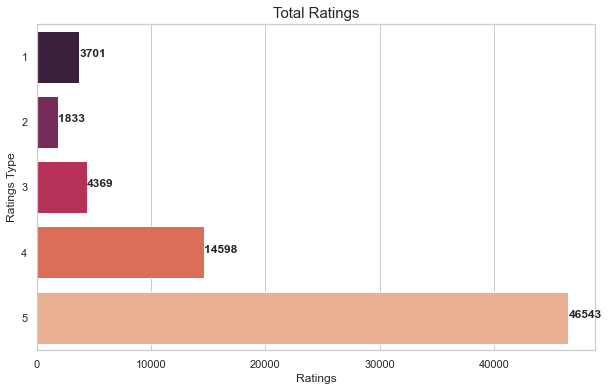

In [9]:
sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x="Ratings", y=reviewsRating.index, data=reviewsRating, ci=None, palette="rocket",orient='h' )
ax.set_title("Total Ratings", fontsize=15)
ax.set_xlabel ("Ratings")
ax.set_ylabel ("Ratings Type")
for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,int(rect.get_width()), weight='bold')
    
bar.savefig('Ratings.jpeg');

In [10]:
#Total sales for each brand (if totals sales was under 20 its sticked with 'others')
brand = data.loc[data['reviews.didPurchase'] == True,['brand','reviews.didPurchase']].reset_index().drop('index',axis=1)
brandSales = brand.groupby('brand').aggregate({'reviews.didPurchase' : 'count'}).reset_index().rename(columns = {'brand' : 'Brand' , 'reviews.didPurchase' : 'Total Sales For Brand'})
mainBrands = brandSales[brandSales['Total Sales For Brand']>10]
otherBrands = brandSales[brandSales['Total Sales For Brand']<10].aggregate({'Total Sales For Brand':'sum'}).rename('Others')
dataToPerform = mainBrands.set_index('Brand').append(otherBrands, ignore_index=False).reset_index()
dataToPerform



,Brand,Total Sales For Brand
0,ANCHOR BAY,17
1,Anti Monkey Butt,19
2,Australian Gold,23
3,Aveeno,18
4,Biotene,63
...,...,...
65,Warner Bros.,18
66,Windex,33
67,Yes to Carrots,35
68,Yes to Grapefruit,26


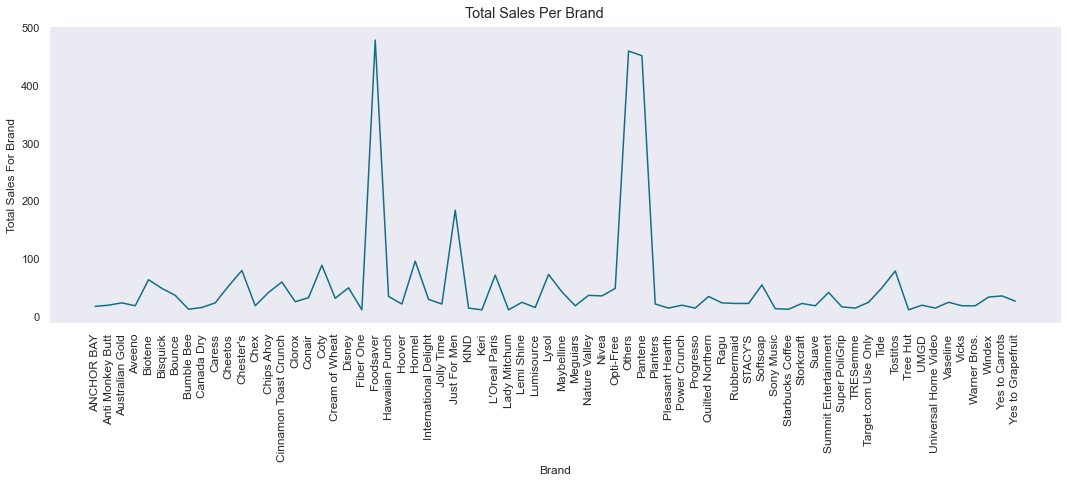

In [11]:
sns.set_style('dark')
ax = sns.relplot(x='Brand',y='Total Sales For Brand',data=dataToPerform,kind='line',aspect = 3,color = '#126e82') 
ax.set(xticks=dataToPerform['Brand'])
ax.set_xticklabels(dataToPerform['Brand'],rotation=90,fontsize=12)
plt.suptitle("Total Sales Per Brand" , y=1.01)

ax.savefig("TotalSalesPerBrand.png");

In [12]:
#brands that the review bought and rated
brand = data.loc[(data['reviews.didPurchase'] == True) & (data['reviews.doRecommend'] == True) ,
                 ['brand','reviews.didPurchase','reviews.doRecommend']].reset_index().drop('index',axis=1)
brandSales = brand.groupby('brand').aggregate({'reviews.didPurchase' : 'count' }).reset_index().rename(columns = {'brand' : 'Brand' , 'reviews.didPurchase' : 'Total Sold And Recomanded Brand'})
mainBrands = brandSales[brandSales['Total Sold And Recomanded Brand']>10]
otherBrands = brandSales[brandSales['Total Sold And Recomanded Brand']<10].aggregate({'Total Sold And Recomanded Brand':'sum'}).rename('Others')
dataToPerform = mainBrands.set_index('Brand').append(otherBrands, ignore_index=False).reset_index()

dataToPerform


,Brand,Total Sold And Recomanded Brand
0,ANCHOR BAY,17
1,Anti Monkey Butt,19
2,Australian Gold,22
3,Aveeno,14
4,Biotene,61
...,...,...
59,Warner Bros.,18
60,Windex,32
61,Yes to Carrots,32
62,Yes to Grapefruit,19


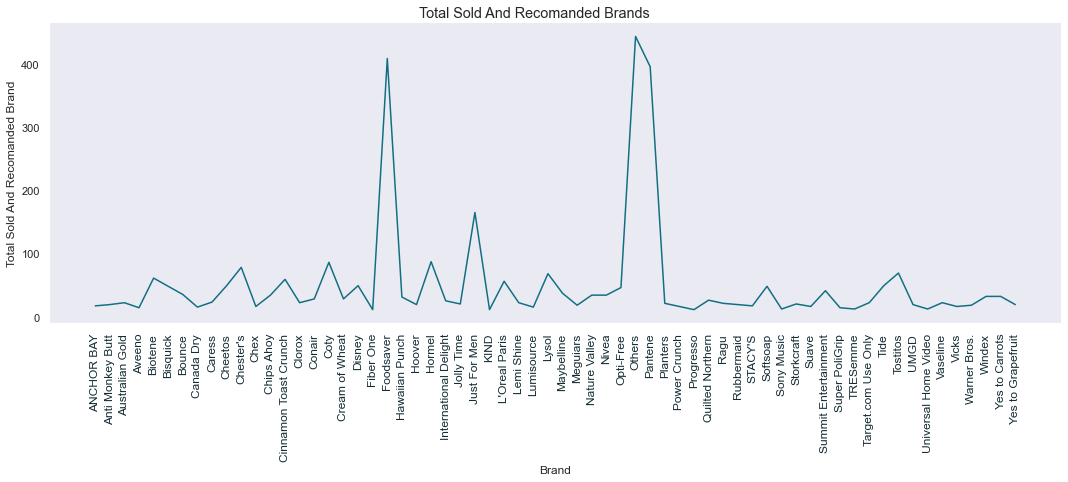

In [13]:
sns.set_style('dark')
ax = sns.relplot(x='Brand',y='Total Sold And Recomanded Brand',data=dataToPerform,kind='line',aspect = 3,color = '#126e82') 
ax.set(xticks=dataToPerform['Brand'])
ax.set_xticklabels(dataToPerform['Brand'],rotation=90,fontsize=12,color='#132c33')
plt.suptitle("Total Sold And Recomanded Brands" , y=1.01)

ax.savefig("TotalSalesAndRecommandedBrands.jpeg");

In [14]:
years = pd.to_datetime(data['dateAdded']).dt.year
sales = pd.Series(data['reviews.didPurchase'])

dataToPerform =pd.DataFrame({'Year':years,"Total Sales Per Year":sales}).groupby('Year').aggregate({'Total Sales Per Year':'count'})
dataToPerform

,Total Sales Per Year
Year,
2014,1521
2015,16384
2016,3564
2017,10689


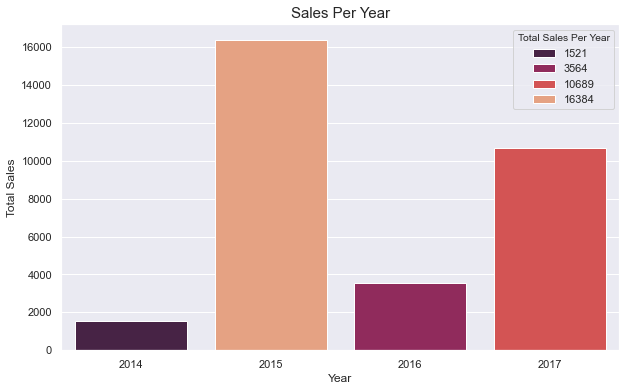

In [15]:
sns.set_style("darkgrid")
ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=dataToPerform.index, y="Total Sales Per Year", data=dataToPerform, ci=None, palette="rocket",orient='v',
                     hue = 'Total Sales Per Year',dodge=False )
ax.set_title("Sales Per Year", fontsize=15)
ax.set_xlabel ("Year")
ax.set_ylabel ("Total Sales")

ax.figure.savefig("SalesPerYear.jpeg");

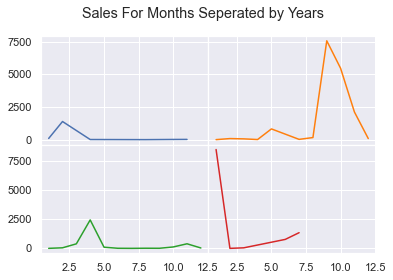

In [16]:
dates = pd.to_datetime(data['dateAdded']).dt
sales = pd.Series(data['reviews.didPurchase'])

dataToPerform = pd.DataFrame({'Year':dates.year, 'Month':dates.month , 'Day':dates.day , 'Sales':sales})

dataFor2014 = dataToPerform[dataToPerform['Year'] == 2014].groupby('Month').aggregate({'Sales':'count'})
dataFor2015 = dataToPerform[dataToPerform['Year'] == 2015].groupby('Month').aggregate({'Sales':'count'})
dataFor2016 = dataToPerform[dataToPerform['Year'] == 2016].groupby('Month').aggregate({'Sales':'count'})
dataFor2017 = dataToPerform[dataToPerform['Year'] == 2017].groupby('Month').aggregate({'Sales':'count'})

fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=0, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Sales For Months Seperated by Years')
ax1.plot(dataFor2014)
ax2.plot(dataFor2015, 'tab:orange')
ax3.plot(dataFor2016, 'tab:green')
ax4.plot(dataFor2017, 'tab:red')



In [17]:
years = pd.to_datetime(data['dateAdded']).dt.year
sales = pd.Series(data['reviews.doRecommend'])

dataToPerform =pd.DataFrame({'Year' : years , "Recommendations Per Year":sales}).groupby('Year').aggregate({'Recommendations Per Year':'count'})
dataToPerform

,Recommendations Per Year
Year,
2014,2868
2015,22949
2016,12323
2017,22289


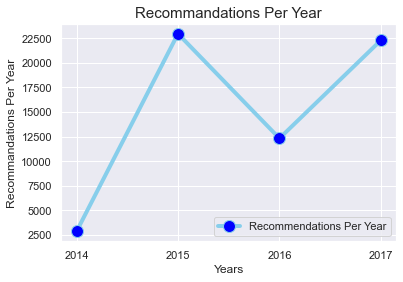

<Figure size 432x288 with 0 Axes>

In [18]:
plt.plot(dataToPerform.index, 'Recommendations Per Year' ,data=dataToPerform, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.xticks(range(dataToPerform.index[0],dataToPerform.index[len(dataToPerform.index)-1]+1))
plt.title("Recommandations Per Year", fontsize=15)
plt.xlabel('Years')
plt.ylabel('Recommandations Per Year')
plt.legend()
plt.show()

plt.savefig("RecommandationsPerYear.png");